## Dataset Information

Dream House Finance company deals in all home loans. They have presence across all urban and rural areas. Customer first apply for home loan after the company validates the customer eligibility for loan. Company wants to automate the loan eligibility process(real time) based on customer details provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependants,Income, Loan Amount, Credit History and Others. To automate this process,They have given a process to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task. A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes.

                Variable                   Description
        -------------------------------------------------------------
               Loan_ID                    unique Loan ID
               Gender                     Male/Female
               Married                    Married(Y/N)
               Dependents                 Number of Dependents
               Education                  Graduate/Undergraduate
               Self_Employed              self employed(Y/N)
               ApplicandIncome            applicant income
               Coapplicantincome          Coapplicant Income
               LoanAmount                Loan amount in thousand
               Loan_Amount_Term          Term of loan in months
               Credit_History            Credit history meets guidelines
               Property_Area             Urban/Semi Urban/Rural
               Loan_Status               Loan approved(Y/N)
               
               

# Import Modules

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

# Loading the dataset

In [65]:
df = pd.read_csv('Loan Prediction DataSet.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Basic Statistics

In [66]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [68]:
df.shape

(614, 13)

## PreProcessing The Dataset

In [69]:
# Find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [70]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [71]:
df['Gender'].mode()[0]

'Male'

In [72]:
# fill the missing values for numerical terms - mean
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [73]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

C:\Users\ibiso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

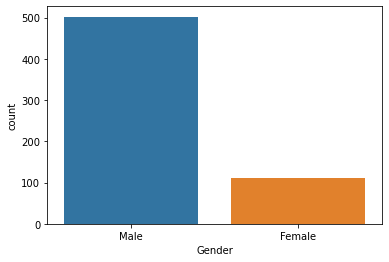

In [74]:
# Categorical attribute visualization
sns.countplot(df['Gender'])

C:\Users\ibiso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

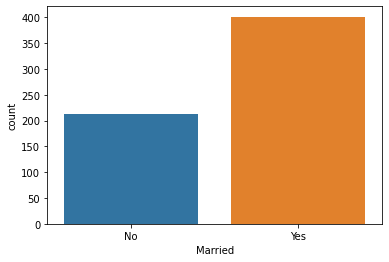

In [75]:
sns.countplot(df['Married'])

C:\Users\ibiso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

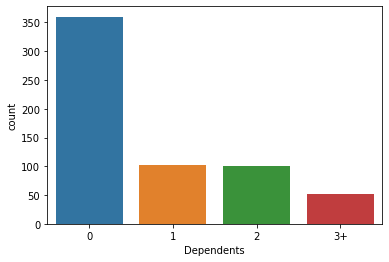

In [76]:
sns.countplot(df['Dependents'])

C:\Users\ibiso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

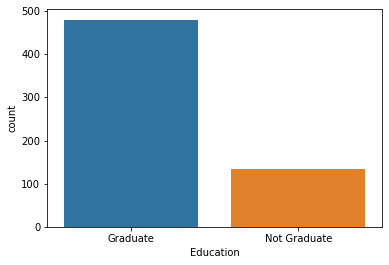

In [77]:
sns.countplot(df['Education'])

C:\Users\ibiso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

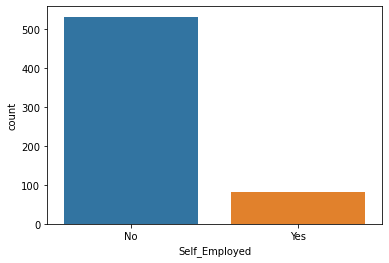

In [78]:
sns.countplot(df['Self_Employed'])

C:\Users\ibiso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

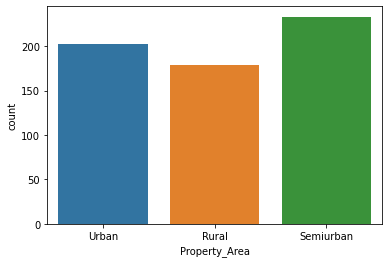

In [79]:
sns.countplot(df['Property_Area'])

C:\Users\ibiso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

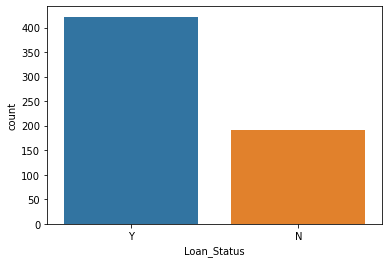

In [80]:
sns.countplot(df['Loan_Status'])

C:\Users\ibiso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

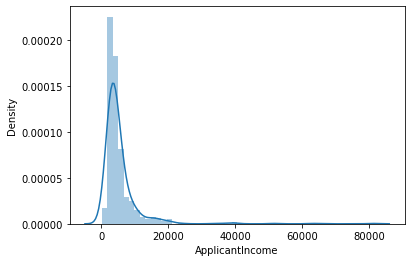

In [81]:
# numerical attribute visualization
sns.distplot(df['ApplicantIncome'])

C:\Users\ibiso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

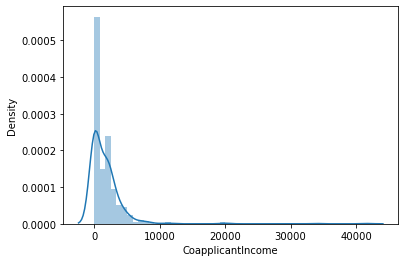

In [82]:
sns.distplot(df['CoapplicantIncome'])

C:\Users\ibiso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

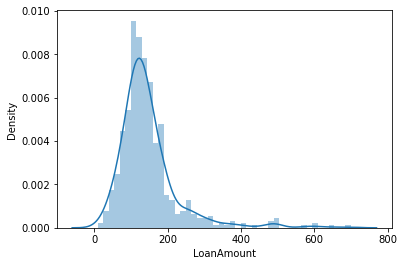

In [83]:
sns.distplot(df['LoanAmount'])

C:\Users\ibiso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

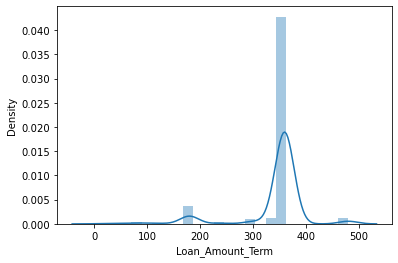

In [84]:
sns.distplot(df['Loan_Amount_Term'])

C:\Users\ibiso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

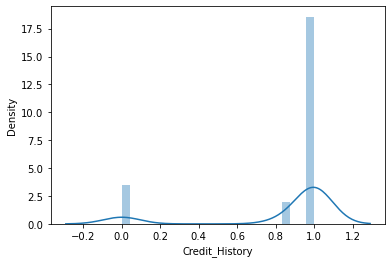

In [85]:
sns.distplot(df['Credit_History'])

## Creation of New Attributes

In [86]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


## Transform Column with Log

C:\Users\ibiso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

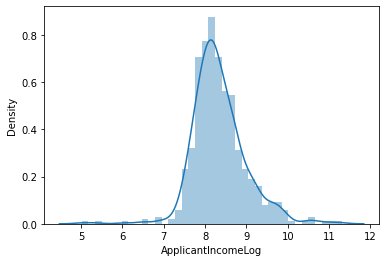

In [87]:
# Apply Log Transformation to the attributes
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncomeLog'])

C:\Users\ibiso\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ibiso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

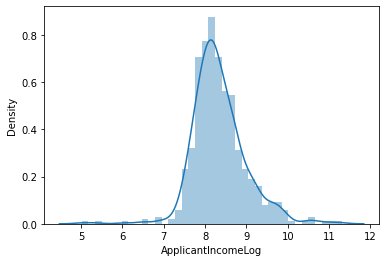

In [88]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
sns.distplot(df['ApplicantIncomeLog'])

C:\Users\ibiso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

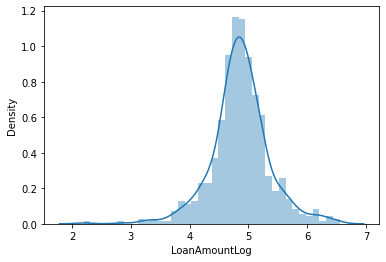

In [89]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmountLog'])

C:\Users\ibiso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

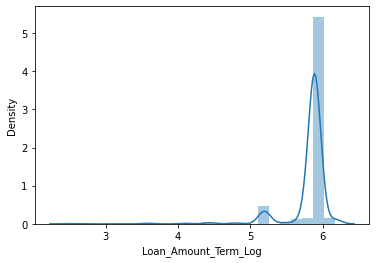

In [90]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term_Log'])

C:\Users\ibiso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

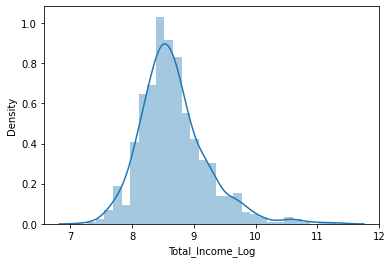

In [91]:
df['Total_Income_Log'] = np.log(df['Total_Income'])
sns.distplot(df['Total_Income_Log'])

In [105]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,-inf,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,-inf,4.948760,5.886104,8.699515


## Coorelation Matrix

<AxesSubplot:>

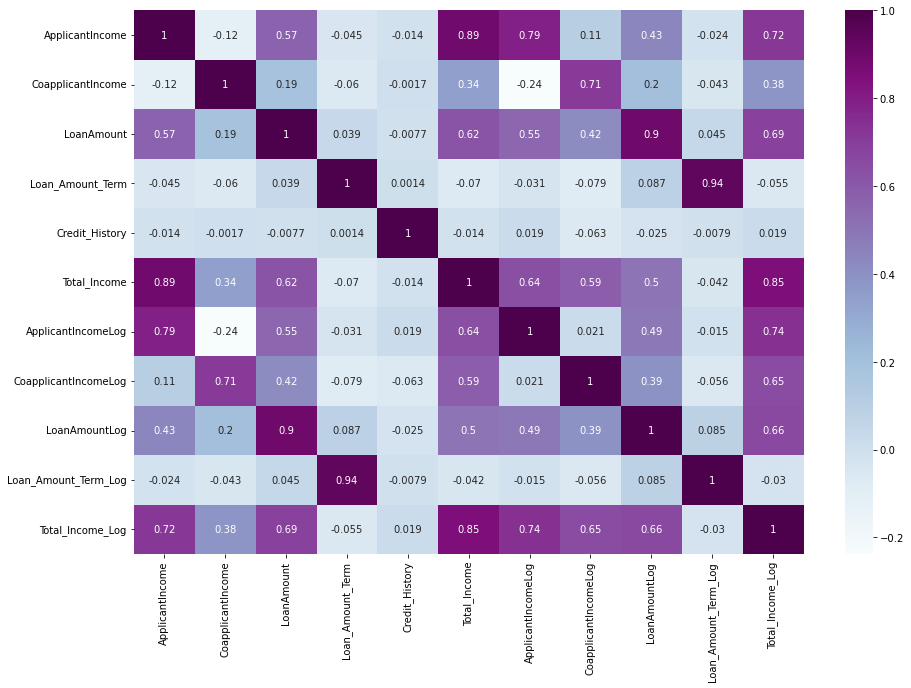

In [103]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='BuPu')

In [107]:
# Drop some columns
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
        'Loan_Amount_Term', 'Total_Income', 'Loan_ID','CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


## Label Encoding

In [132]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', 'Married', 'Education','Self_Employed','Property_Area', 'Loan_Status']
cols = ['Dependents']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [133]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


## Train-Test Split

In [134]:
# Specify input and output attributes
x = df.drop(columns=['Loan_Status'], axis=1)
y =df['Loan_Status']

In [135]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,8.699515,4.948760,5.886104,8.699515


In [136]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [137]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=42)

## Model Training

In [140]:
# Classify function
from sklearn.model_selection import cross_val_score
def Classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy is', model.score(x_test, y_test)*100)
    # Cross validation - used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print('cross validation is',np.mean(score)*100)

In [141]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
Classify(model, x, y)

Accuracy is 78.86178861788618
cross validation is 80.9462881514061


In [142]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
Classify(model, x, y)

Accuracy is 66.66666666666666
cross validation is 70.85032653605224


In [144]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
Classify(model, x, y)

Accuracy is 78.04878048780488
cross validation is 78.50459816073571


In [145]:
model = ExtraTreesClassifier()
Classify(model, x, y)

Accuracy is 75.60975609756098
cross validation is 76.55337864854059


## Hyperparameter tuning

In [148]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, 
                               max_depth=7, max_features=1)
Classify(model, x, y)

Accuracy is 78.86178861788618
cross validation is 80.29454884712783


## Confusion Matrix

A confusion matrix is a summary of predictions results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [149]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [151]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[19, 24],
       [ 6, 74]], dtype=int64)

<AxesSubplot:>

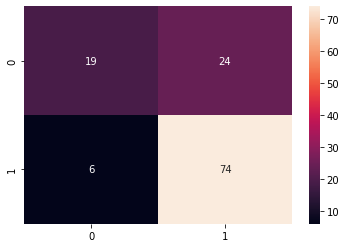

In [152]:
sns.heatmap(cm, annot=True)